# Cyclistic : Case Study

### About :
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and
returned to any other station in the system anytime.<br>
<br>
Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments.
One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customerswho purchase annual memberships are Cyclistic members.<br>
<br>
Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the
pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will
be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a
very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.<br>
<br>
Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to
do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why
casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are
interested in analyzing the Cyclistic historical bike trip data to identify trends.

__Data Source Used :__
Divvy Data - The data has been processed to remove trips that are taken by staff as they service and inspect the system; and any trips that were below 60 seconds in length (potentially false starts or users trying to re-dock a bike to ensure it was secure)

### Business Task :
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

In [1]:
#Importing required Libraries

import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy.stats
%matplotlib inline

In [2]:
# Loading the csv file
df = pd.read_csv('bikedata.csv')

#Converting datatype to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

#Calculating journey time
df['time_diff'] = df['ended_at'] - df['started_at']
df['time_diff'] = df['time_diff']/np.timedelta64(1,'m')

#Calculating day of week at the start of journey where 0 denotes sunday
df['weekday'] = df['started_at'].dt.weekday
df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_diff,weekday
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:00,2021-03-16 08:36:00,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,41.917513,-87.701809,41.917741,-87.691392,casual,4.0,1
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:00,2021-03-28 01:36:00,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,41.917513,-87.701809,41.914166,-87.716755,casual,10.0,6
2,846D87A15682A284,classic_bike,2021-11-03 21:17:00,2021-11-03 21:33:00,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,41.842733,-87.635491,41.830661,-87.647172,casual,16.0,2
3,994D05AA75A168F2,classic_bike,2021-11-03 13:26:00,2021-11-03 13:55:00,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,41.968812,-87.657659,41.952833,-87.649993,casual,29.0,2
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:00,2021-03-21 09:27:00,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.012701,-87.666058,42.050491,-87.677821,casual,18.0,6
5,CEBA8516FD17F8D8,classic_bike,2021-03-20 11:08:00,2021-03-20 11:29:00,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.012701,-87.666058,42.050491,-87.677821,casual,21.0,5
6,297268586B79588B,classic_bike,2021-03-20 14:10:00,2021-03-20 14:22:00,State St & Kinzie St,13050,Lake Shore Dr & North Blvd,LF-005,41.889187,-87.627754,41.911722,-87.626804,member,12.0,5
7,F39301858B6077DD,electric_bike,2021-03-23 07:56:00,2021-03-23 08:05:00,Shore Dr & 55th St,TA1308000009,Ellis Ave & 60th St,KA1503000014,41.795230,-87.580828,41.785218,-87.601083,member,9.0,1
8,D297F199D875BABE,electric_bike,2021-03-31 15:31:00,2021-03-31 15:35:00,Clinton St & Lake St,13021,Franklin St & Jackson Blvd,TA1305000025,41.885552,-87.641727,41.877287,-87.636155,member,4.0,2
9,36B877141175ED7E,classic_bike,2021-11-03 17:37:00,2021-11-03 17:52:00,Michigan Ave & Lake St,TA1305000011,Racine Ave & Washington Blvd,654,41.886024,-87.624117,41.883073,-87.656952,member,15.0,2


In [3]:
df.describe(include='all')

<ipython-input-3-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')
<ipython-input-3-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_diff,weekday
count,228496,228496,228496,228496,213648,213648,211769,211769,228496.000000,228496.000000,228329.000000,228329.000000,228496,228496.000000,228496.000000
unique,228496,3,35029,35046,673,673,673,673,NaN,NaN,NaN,NaN,2,NaN,NaN
top,AC6A9363ED204FC8,classic_bike,2021-03-21 13:49:00,2021-03-21 16:22:00,Lake Shore Dr & Monroe St,13300,Lake Shore Dr & Monroe St,13300,NaN,NaN,NaN,NaN,member,NaN,NaN
freq,1,152545,52,50,2453,2453,2380,2380,NaN,NaN,NaN,NaN,144463,NaN,NaN
first,NaN,NaN,2021-01-03 00:01:00,2021-01-03 00:06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2021-12-03 23:59:00,2021-12-03 23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.901402,-87.644848,41.901734,-87.645036,NaN,10.205089,3.314491
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.044481,0.026351,0.044470,0.026403,NaN,4830.326200,2.053793
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.648501,-87.780000,41.640000,-88.070000,NaN,-383035.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.881032,-87.659141,41.881113,-87.659172,NaN,7.000000,2.000000


In [4]:
df=df[(df['time_diff']>=0)]
df.describe(include='all')

# 64 outliers havving negative time difference are removed to avoid discrepency
# Removal of 64 data points is acceptable because the number of observation is large

<ipython-input-4-d70df7102f10>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')
<ipython-input-4-d70df7102f10>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_diff,weekday
count,228432,228432,228432,228432,213589,213589,211720,211720,228432.000000,228432.000000,228270.000000,228270.000000,228432,228432.000000,228432.000000
unique,228432,3,35007,35010,673,673,673,673,NaN,NaN,NaN,NaN,2,NaN,NaN
top,AC6A9363ED204FC8,classic_bike,2021-03-21 13:49:00,2021-03-21 16:22:00,Lake Shore Dr & Monroe St,13300,Lake Shore Dr & Monroe St,13300,NaN,NaN,NaN,NaN,member,NaN,NaN
freq,1,152519,52,50,2451,2451,2379,2379,NaN,NaN,NaN,NaN,144439,NaN,NaN
first,NaN,NaN,2021-01-03 00:01:00,2021-01-03 00:06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2021-12-03 23:55:00,2021-12-03 23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.901406,-87.644847,41.901735,-87.645034,NaN,75.265169,3.314623
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.044478,0.026348,0.044470,0.026399,NaN,1795.175624,2.053941
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.648501,-87.780000,41.640000,-88.070000,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.881032,-87.659141,41.881113,-87.659172,NaN,7.000000,2.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228432 entries, 0 to 228495
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             228432 non-null  object        
 1   rideable_type       228432 non-null  object        
 2   started_at          228432 non-null  datetime64[ns]
 3   ended_at            228432 non-null  datetime64[ns]
 4   start_station_name  213589 non-null  object        
 5   start_station_id    213589 non-null  object        
 6   end_station_name    211720 non-null  object        
 7   end_station_id      211720 non-null  object        
 8   start_lat           228432 non-null  float64       
 9   start_lng           228432 non-null  float64       
 10  end_lat             228270 non-null  float64       
 11  end_lng             228270 non-null  float64       
 12  member_casual       228432 non-null  object        
 13  time_diff           228432 no

#### Using Gourp by to understand the frequency:

In [6]:
df.groupby('start_station_name')['ride_id'].count().sort_values()

start_station_name
Commercial Ave & 100th St           1
N Hampden Ct & W Diversey Ave       1
N Damen Ave & W Wabansia St         1
N Carpenter St & W Lake St          1
Ashland Ave & Garfield Blvd         1
                                 ... 
Wells St & Elm St                1660
Millennium Park                  1757
Clark St & Elm St                1935
Streeter Dr & Grand Ave          2073
Lake Shore Dr & Monroe St        2451
Name: ride_id, Length: 673, dtype: int64

In [7]:
df.groupby('end_station_name')['ride_id'].count().sort_values()

end_station_name
Bradley Park                    1
Halsted St & 96th St            1
Halsted St & 69th St            1
Halsted St & 59th St            1
Marshfield Ave & 59th St        1
                             ... 
Michigan Ave & Oak St        1713
Millennium Park              1869
Clark St & Elm St            1924
Streeter Dr & Grand Ave      2037
Lake Shore Dr & Monroe St    2379
Name: ride_id, Length: 673, dtype: int64

In [8]:
df.groupby('rideable_type')['ride_id'].count().sort_values()

rideable_type
docked_bike       15635
electric_bike     60278
classic_bike     152519
Name: ride_id, dtype: int64

In [9]:
df.groupby('member_casual')['ride_id'].count().sort_values()

member_casual
casual     83993
member    144439
Name: ride_id, dtype: int64

In [10]:
df.groupby('rideable_type')['time_diff'].count().sort_values()

rideable_type
docked_bike       15635
electric_bike     60278
classic_bike     152519
Name: time_diff, dtype: int64

In [11]:
df.groupby('member_casual')['time_diff'].count().sort_values()

member_casual
casual     83993
member    144439
Name: time_diff, dtype: int64

#### Dropping unwanted columns:

In [12]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'time_diff', 'weekday'],
      dtype='object')

In [13]:
df.drop(['ride_id','start_station_id','end_station_id','start_lat','start_lng','end_lat','end_lng'],axis=1,inplace=True)
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,time_diff,weekday
0,classic_bike,2021-03-16 08:32:00,2021-03-16 08:36:00,Humboldt Blvd & Armitage Ave,Stave St & Armitage Ave,casual,4.0,1
1,classic_bike,2021-03-28 01:26:00,2021-03-28 01:36:00,Humboldt Blvd & Armitage Ave,Central Park Ave & Bloomingdale Ave,casual,10.0,6
2,classic_bike,2021-11-03 21:17:00,2021-11-03 21:33:00,Shields Ave & 28th Pl,Halsted St & 35th St,casual,16.0,2
3,classic_bike,2021-11-03 13:26:00,2021-11-03 13:55:00,Winthrop Ave & Lawrence Ave,Broadway & Sheridan Rd,casual,29.0,2
4,classic_bike,2021-03-21 09:09:00,2021-03-21 09:27:00,Glenwood Ave & Touhy Ave,Chicago Ave & Sheridan Rd,casual,18.0,6


#### Treating missing values:

In [14]:
# Calculating the number of missing values
df.isnull().sum()

rideable_type             0
started_at                0
ended_at                  0
start_station_name    14843
end_station_name      16712
member_casual             0
time_diff                 0
weekday                   0
dtype: int64

In [15]:
# Replacing missing values with the string 'missing'
df['start_station_name'] = df['start_station_name'].replace(np.nan,'missing')
df['end_station_name'] = df['end_station_name'].replace(np.nan,'missing')
df.isnull().sum()

rideable_type         0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
member_casual         0
time_diff             0
weekday               0
dtype: int64

## Data Visualization

#### Univariate data exploration

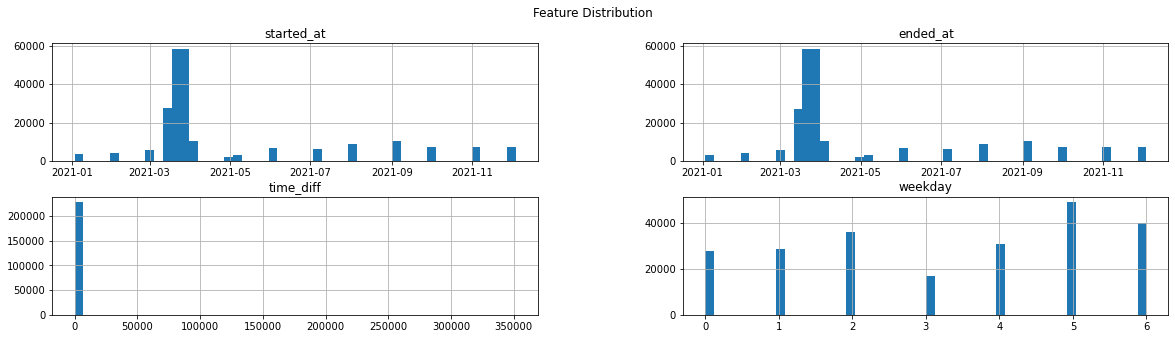

In [16]:
df.hist(bins=50,figsize=(20,5))
plt.suptitle('Feature Distribution')
plt.show()

#y-axis represents time in minutes

<Figure size 2160x2160 with 0 Axes>

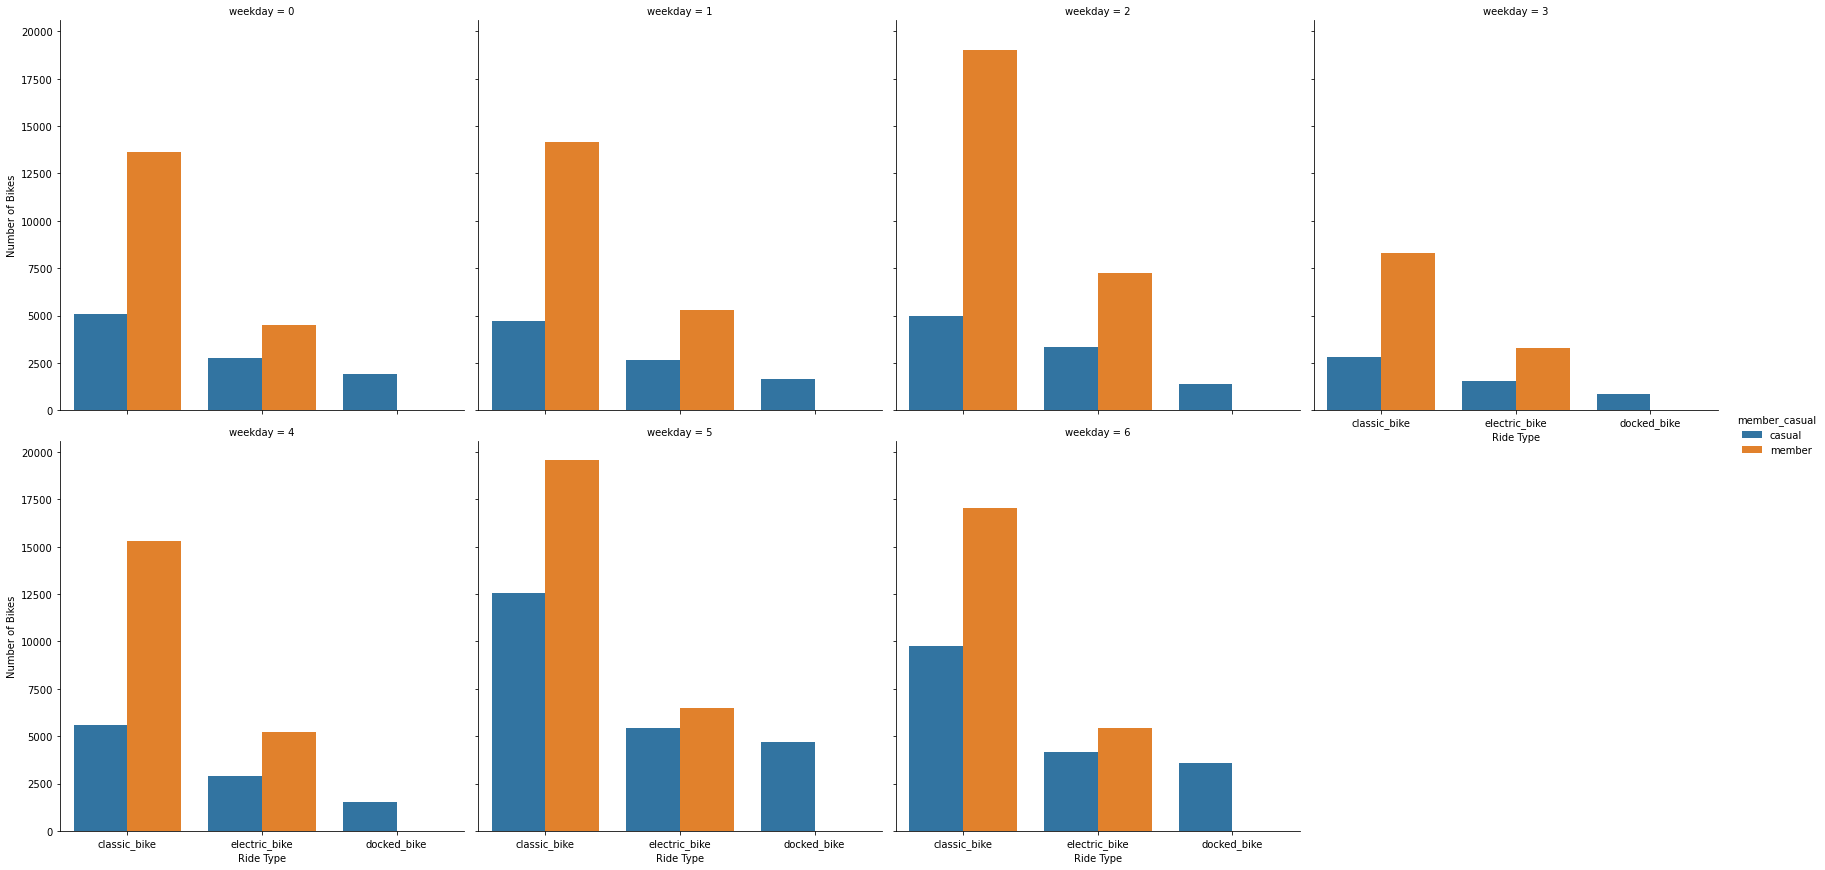

In [17]:
# Counting number of bikes in a day
plt.figure(figsize=(30,30))
gra = sns.catplot(x='rideable_type',hue='member_casual',col='weekday',col_wrap=4,kind='count',data=df,height=6,aspect=1)
gra.set_xlabels('Ride Type')
gra.set_ylabels('Number of Bikes')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 720x720 with 0 Axes>

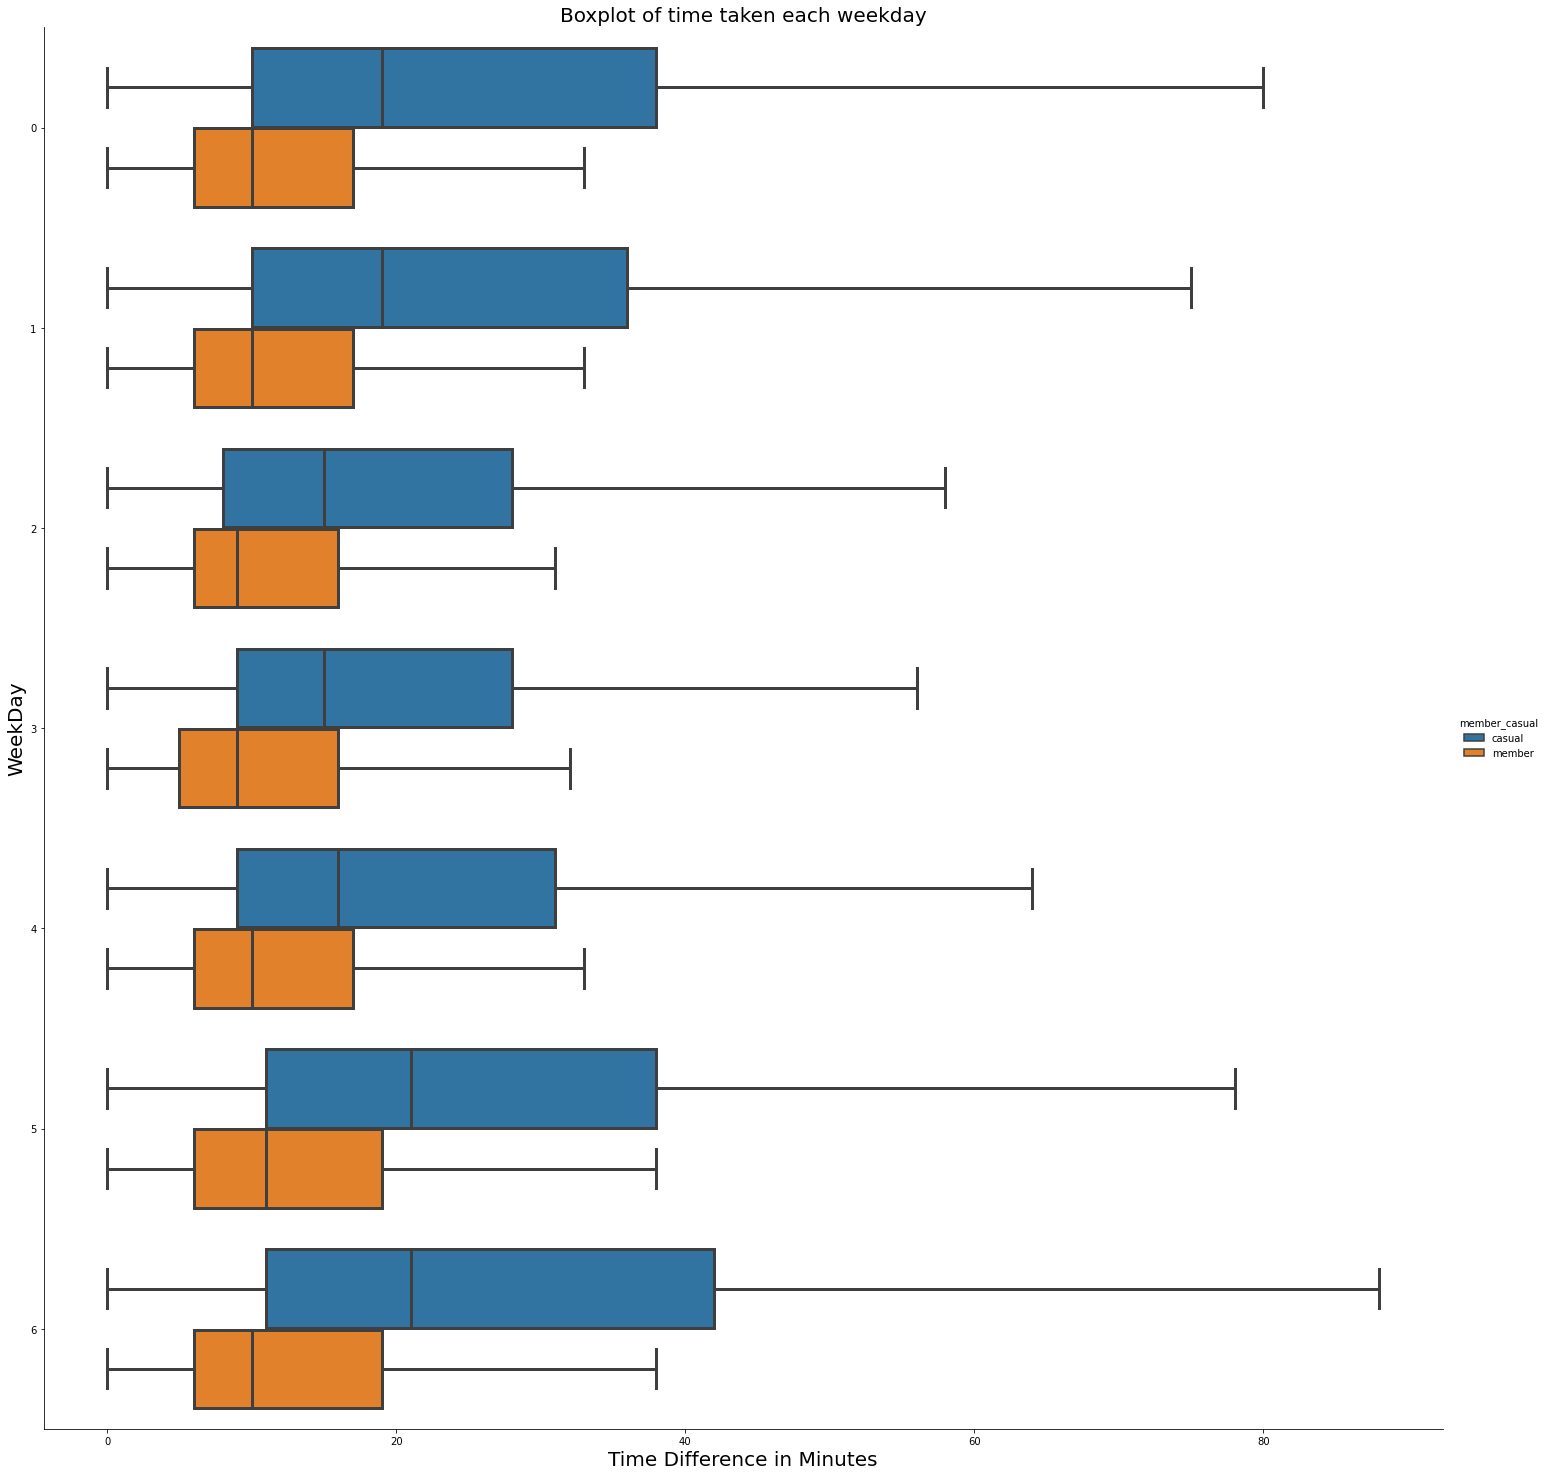

In [18]:
plt.figure(figsize=(10,10))
sns.catplot(x="time_diff",y="weekday",hue="member_casual", ci=None,data=df, color=None, linewidth=3, showfliers = False,
               orient="h", height=20, aspect=1, palette=None,kind="box", dodge=True)

plt.xlabel("Time Difference in Minutes", size=20)
plt.ylabel("WeekDay", size=20)
plt.title("Boxplot of time taken each weekday", size=20)
plt.show

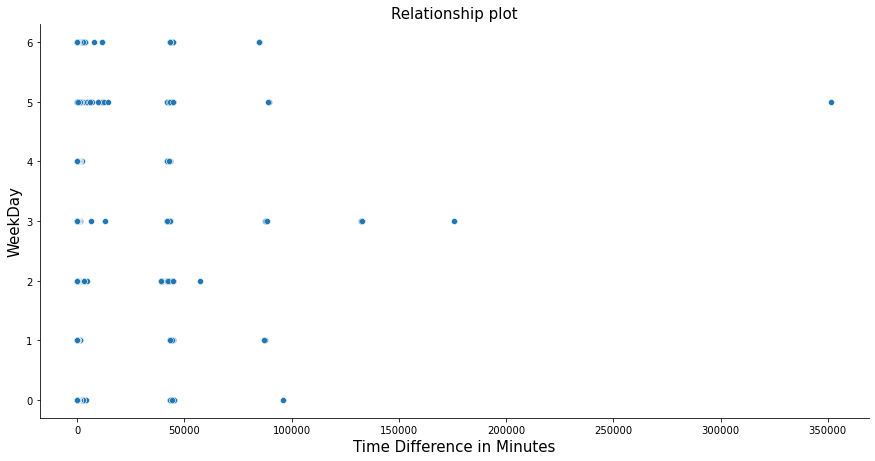

In [19]:
sns.relplot(x="time_diff", y="weekday", data=df, height = 6, aspect = 2)
plt.xlabel("Time Difference in Minutes", size=15)
plt.ylabel("WeekDay", size=15)
plt.title("Relationship plot", size=15)
plt.show()

### Time Series Analysis

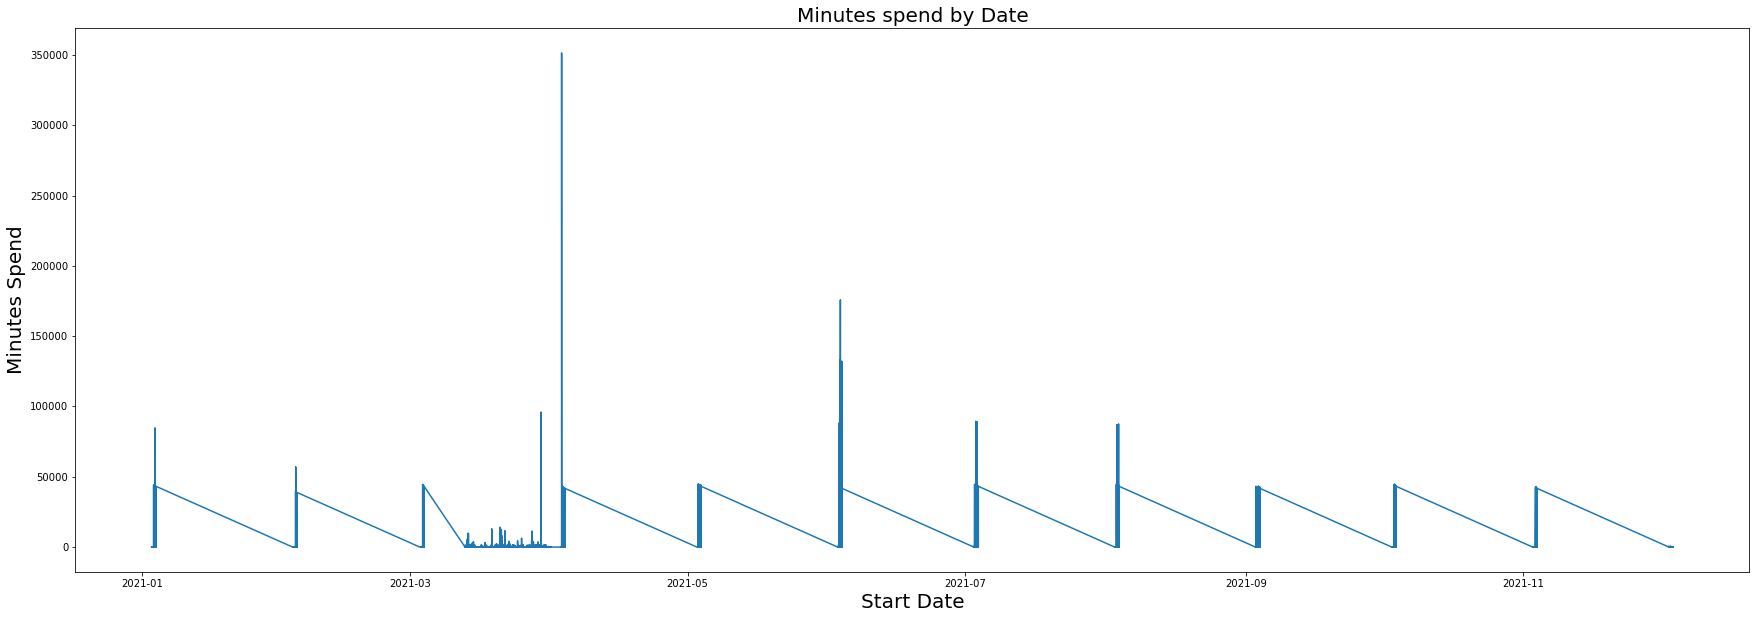

In [20]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.started_at,y=df.time_diff,data=df, estimator=None)
plt.title("Minutes spend by Date", fontsize=20)
plt.xlabel("Start Date", fontsize=20)
plt.ylabel("Minutes Spend", fontsize=20)
plt.show()

In [23]:
df.corr()

,time_diff,weekday
time_diff,1.000000,0.000702
weekday,0.000702,1.000000


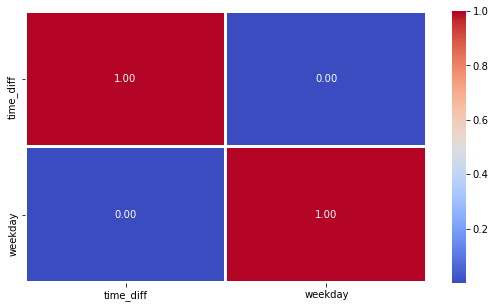

In [24]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("", fontsize=20)
plt.show()

### Analysis

1. Casual riders spent more time in bikes.
2. Popular spot is Lake Shore Dr & Monroe St.
3. Classic bikes are most rented.
4. Docked bikes spent most time cycling.
5. Saturday has highest count of rented bikes.
6. Member riders love classic and electric bikes but casual riders prefer docked bikes.
7. Member riders have been in consistent usage for all days, same for casual riders.
8. Member riders spent less time biking than casual riders.
9. Majority of time spent riding whole one week is less than 5000 minutes or 83 hours.